In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

## 검증세트 만들기

In [11]:
X_valid, X_train = X_train_full[:5000] /255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
#  한 줄 씩 추가 하지 않고 층의 리스트 형태로도 전달가능
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation ='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7353 - accuracy: 0.7557 - val_loss: 0.5332 - val_accuracy: 0.8134
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4909 - accuracy: 0.8305 - val_loss: 0.4520 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8460 - val_loss: 0.4135 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4153 - accuracy: 0.8549 - val_loss: 0.3940 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3965 - accuracy: 0.8610 - val_loss: 0.3894 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8665 - val_loss: 0.4096 - val_accuracy: 0.8558
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3664 - accuracy: 0.8704 - val_loss: 0.3737 - val_accuracy:

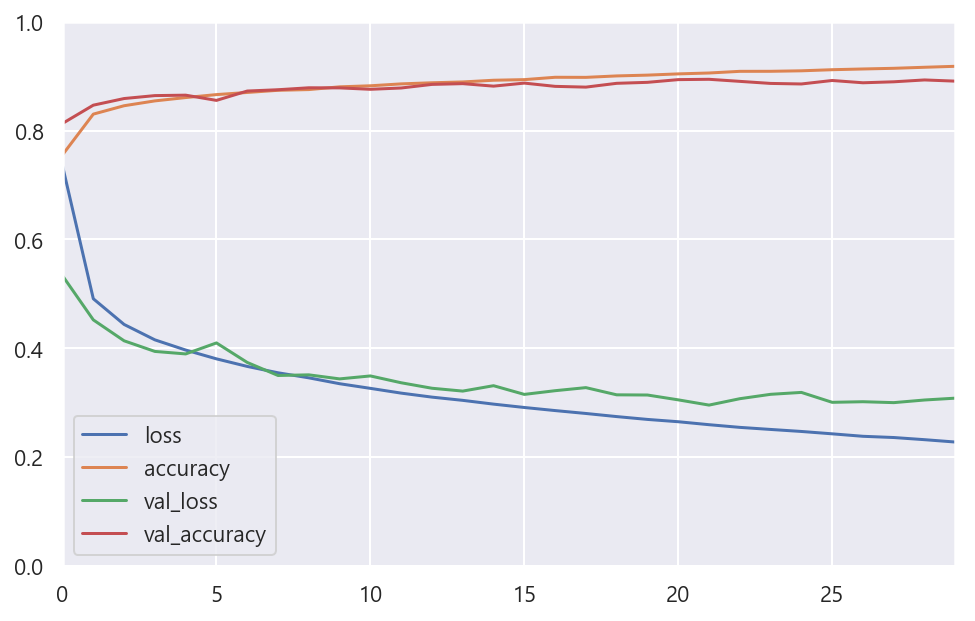

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8815


[0.33892613649368286, 0.8815000057220459]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')